## XGBoost on Tennessee Eastman Process


Tennessee Eastman process was developed by Eastman Chemical company to deliver a realistic industrial application process for assessing process control and monitoring methods. 

The TE process has five main unit: a reactor, a condenser, compressor, separator, and stripper. The process has 21 pre-programmed faults. Out of 21, only sixteen faults are known and remaining five faults are unknown. 



## Importing the necessary libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Here instead of performing on all datasets, some random faults are choosen and concatnated. The faults choosen are 0, 1, 4, 8, 15 and 17. 


In [32]:
#importing the data
Training_data = pd.read_excel ('d00_ 1 4 8 15 17.xlsx')
Testing_data = pd.read_excel ('d00_te_1_4_8_15_17.xlsx')
X_train, y_train = Training_data.iloc[:,:-1].values , Training_data.iloc[:,-1].values
X_test, y_test = Testing_data.iloc[:,:-1].values , Testing_data.iloc[:,-1].values

### Checking the data description

In [4]:
Training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 53 columns):
1                2900 non-null float64
2                2900 non-null float64
3                2900 non-null float64
4                2900 non-null float64
5                2900 non-null float64
6                2900 non-null float64
7                2900 non-null float64
8                2900 non-null float64
9                2900 non-null float64
10               2900 non-null float64
11               2900 non-null float64
12               2900 non-null float64
13               2900 non-null float64
14               2900 non-null float64
15               2900 non-null float64
16               2900 non-null float64
17               2900 non-null float64
18               2900 non-null float64
19               2900 non-null float64
20               2900 non-null float64
21               2900 non-null float64
22               2900 non-null float64
23               2900 non-null floa

In [5]:
Training_data.head()

,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,Target values
0,2498700.0,3.642600e+10,4.539600e+10,92784000.0,272000000.0,422480000.0,2.704200e+10,754920000.0,1.204000e+09,3399000.0,...,247080000.0,622650000.0,222240000.0,397240000.0,419750000.0,502230000.0,474110000.0,410930000.0,183510000.0,0
1,2511800.0,3.694800e+10,4.513800e+10,92831000.0,270770000.0,427360000.0,2.705400e+10,746280000.0,1.204100e+09,3356000.0,...,245790000.0,613060000.0,219750000.0,402490000.0,341870000.0,447410000.0,474420000.0,413030000.0,198310000.0,0
2,2518500.0,3.683500e+10,4.504900e+10,94600000.0,269870000.0,422450000.0,2.705200e+10,743150000.0,1.204200e+09,3376100.0,...,245210000.0,605320000.0,216400000.0,400030000.0,436280000.0,460320000.0,475740000.0,415200000.0,204260000.0,0
3,2514700.0,3.653900e+10,4.531900e+10,93462000.0,269830000.0,426560000.0,2.706300e+10,754870000.0,1.203900e+09,3363100.0,...,245580000.0,614960000.0,223240000.0,401610000.0,379670000.0,439030000.0,476060000.0,412840000.0,195680000.0,0
4,2410700.0,3.629300e+10,4.527000e+10,93406000.0,270410000.0,425200000.0,2.705600e+10,753320000.0,1.203800e+09,3483900.0,...,240240000.0,607810000.0,225060000.0,409620000.0,342470000.0,480370000.0,475850000.0,409490000.0,170630000.0,0


In [6]:
Training_data.describe()

,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,Target values
count,2.900000e+03,2.900000e+03,2.900000e+03,2.900000e+03,2.900000e+03,2.900000e+03,2.900000e+03,2.900000e+03,2.900000e+03,2.900000e+03,...,2.900000e+03,2.900000e+03,2.900000e+03,2.900000e+03,2.900000e+03,2.900000e+03,2.900000e+03,2.900000e+03,2.900000e+03,2900.000000
mean,4.329964e+05,6.316448e+09,7.778482e+09,1.611088e+07,4.639276e+07,7.299780e+07,4.664481e+09,1.292841e+08,2.075853e+08,5.820559e+05,...,4.262290e+07,1.057283e+08,3.836597e+07,6.910662e+07,6.601304e+07,8.019515e+07,8.182962e+07,7.085305e+07,3.140671e+07,7.448276
std,9.561760e+05,1.384166e+10,1.704524e+10,3.530466e+07,1.016626e+08,1.599603e+08,1.022114e+10,2.833044e+08,4.548749e+08,1.276361e+06,...,9.413071e+07,2.317311e+08,8.408760e+07,1.515485e+08,1.452021e+08,1.760004e+08,1.795267e+08,1.552732e+08,6.909683e+07,6.559023
min,-4.409900e-04,3.535400e+03,4.206500e+03,8.009000e+00,2.613300e+01,4.141500e+01,2.549700e+03,6.973900e+01,1.197200e+02,2.085100e-01,...,-1.267800e-02,5.181500e+01,1.282800e+01,2.529300e+01,2.774300e+01,3.833500e+01,1.162300e+01,3.683400e+01,1.245900e+01,0.000000
25%,2.373100e-01,3.642900e+03,4.477600e+03,9.215300e+00,2.678175e+01,4.220100e+01,2.699200e+03,7.464700e+01,1.203900e+02,3.229375e-01,...,2.332000e+01,5.990300e+01,2.183550e+01,3.831075e+01,3.650375e+01,4.519950e+01,4.733500e+01,4.099050e+01,1.738325e+01,1.000000
50%,2.780350e-01,3.672650e+03,4.517950e+03,9.347850e+00,2.695400e+01,4.239800e+01,2.707500e+03,7.521100e+01,1.204100e+02,3.374800e-01,...,2.730950e+01,6.135850e+01,2.237400e+01,4.015450e+01,3.877600e+01,4.702450e+01,4.996900e+01,4.206750e+01,1.852450e+01,4.000000
75%,7.699525e-01,3.713500e+03,4.579825e+03,9.491925e+00,2.718000e+01,4.266525e+01,2.738900e+03,7.638950e+01,1.204500e+02,3.584150e-01,...,7.560500e+01,6.315025e+01,2.429475e+01,4.275075e+01,4.193125e+01,4.959350e+01,6.524300e+01,4.536650e+01,2.005375e+01,15.000000
max,3.428500e+06,3.754700e+10,4.600700e+10,9.592800e+07,2.752900e+08,4.292500e+08,2.715800e+10,7.675000e+08,1.204500e+09,3.700800e+06,...,3.368200e+08,6.532300e+08,2.331300e+08,4.457500e+08,4.745300e+08,5.315200e+08,5.212400e+08,4.264100e+08,2.314400e+08,17.000000


The target variables are separated from training and test data. The coulumn name 'Target values' is the column with targets. 
Since we have training and testing data already separated, there is no need of train test split. Let's check the features and target data after one hot encoding. 

In [16]:
y_train, y_train.shape

(array([ 0,  0,  0, ..., 17, 17, 17], dtype=int64), (2900,))

In [14]:
y_test, y_test.shape

(array([ 0,  0,  0, ..., 17, 17, 17], dtype=int64), (5760,))

In [18]:
X_train.shape , X_test.shape

((2900, 52), (5760, 52))

## XG Boost Classifier

XGBoost is also known as Extreme Boost Gradient Boosting. It is one of best algorithms due to its performance in both classification and regression.


XGBoost belongs to gradient boosted trees. It works on gradient boosting framework which works on the principle of an ensemble i.e. it combined a set of weak learners and creates a model with improved accuracy. Due to large number of parameters in XGBoost, it performs extremely well in prediction.

In [33]:
from xgboost import XGBClassifier

classifier = XGBClassifier()
classifier.fit(X_train,y_train)
# predictions for test data
y_pred = classifier.predict(X_test)

In [53]:
#Model Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
confusionMatrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy Score: {accuracy}')
print(f'Confusion Matrix:\n {confusionMatrix}')

Accuracy Score: 0.5255208333333333
Confusion Matrix:
 [[   0    0    0    4   71 1685]
 [   0  786    0    0    0   14]
 [   0    0  797    0    0    3]
 [   0   13    0  595    0  192]
 [   0    0    0    7   52  741]
 [   0    0    0    1    2  797]]


In [57]:
#validation
from sklearn.model_selection import cross_val_score
scores =  cross_val_score(classifier, X = X_train, y =y_train, cv=10, scoring = 'accuracy')
scores.mean()
scores.std()

print(f'The Cross Validation Scores of our model:\n {scores}')
print(f'\nThe average of our scores: {scores.mean()}')
print(f'\nThe standard deviation: {scores.std()}')

The Cross Validation Scores of our model:
 [0.67931034 1.         0.99310345 0.92758621 0.95517241 0.97241379
 0.95862069 0.94137931 0.99655172 0.97931034]

The average of our scores: 0.9403448275862069

The standard deviation: 0.08994713733556646


In [58]:
#grid search
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [50, 100, 150, 200, 250, 300],'max_depth': [2, 4, 6, 8]}]
grid_search = GridSearchCV(estimator= classifier, param_grid=parameters, scoring = 'accuracy', cv = 10, n_jobs=-1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print(f'The best accuracy obtained: {best_accuracy}')
print(f'The best parameters used to obtain the best accuracy are {best_parameters}')

The best accuracy obtained: 0.9403448275862069
The best parameters used to obtain the best accuracy are {'max_depth': 6, 'n_estimators': 100}


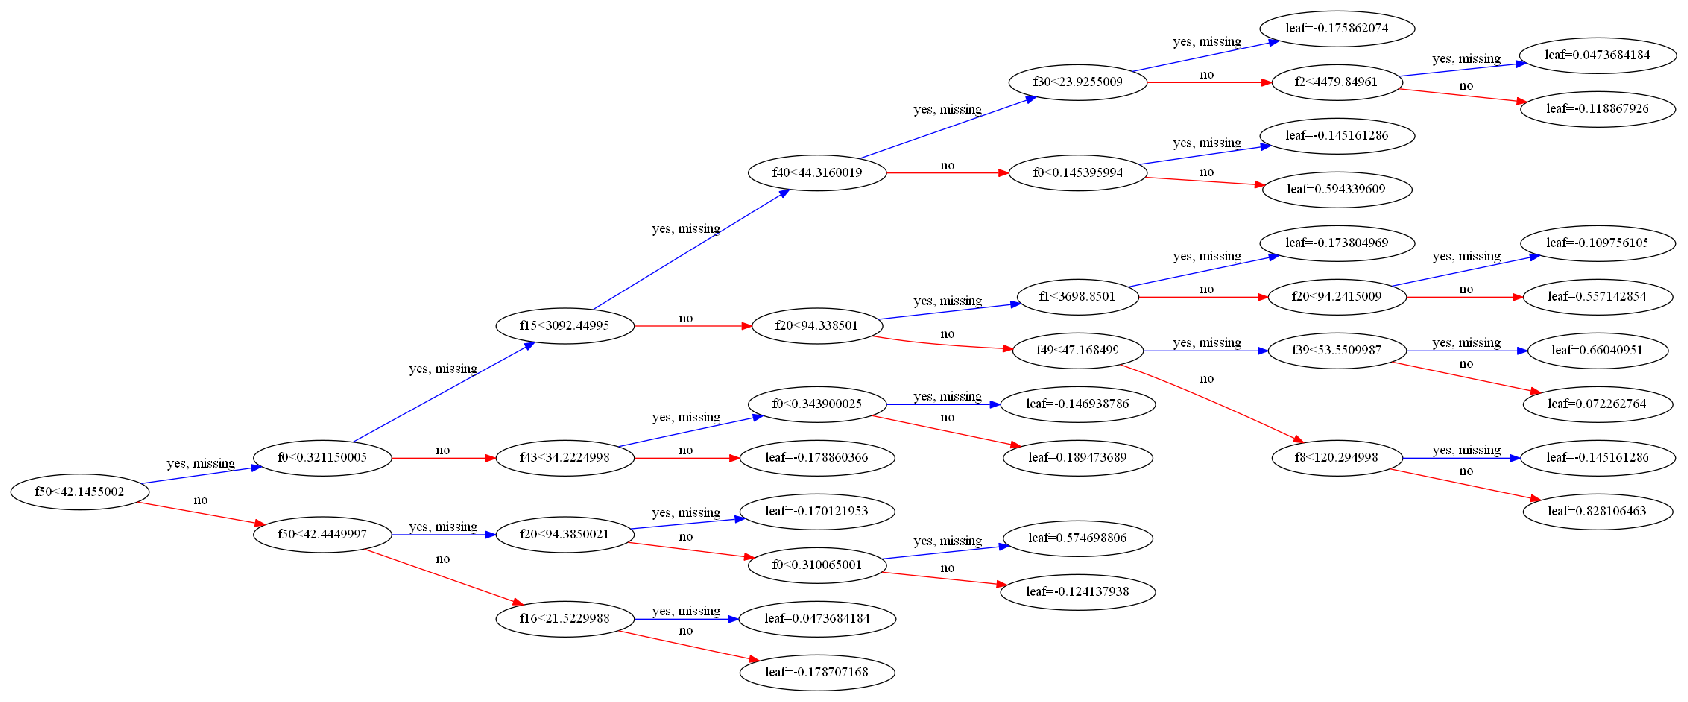

In [79]:
#Plotting the tree

import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files (x86)\graphviz-2.38\release\bin'

fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(classifier, num_trees=4, rankdir = 'LR', ax=ax)
plt.show()